In [39]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D
plt.style.use('ggplot')


In [3]:
mnistData = load_data()

In [4]:
(x_train,y_train) , (x_test, y_test) = mnistData

In [5]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

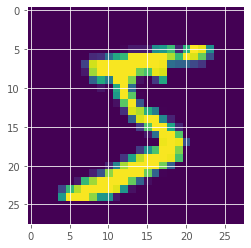

In [6]:
plt.imshow(x_train[0])   # [면, 행, 열]


In [22]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

y_train을 원핫 인코딩

In [23]:
y_trainOne = to_categorical(y_train)

In [24]:
model = Sequential()

#  (28-3) / 1 +1 이 32만큼
model.add( Conv2D( 32, kernel_size=(3,3) ,strides=1,input_shape=(28,28,1), activation='relu' ,padding='same' ) )
model.add( Conv2D( 64, kernel_size=(3,3), activation='relu' ) )
model.add( MaxPool2D( pool_size=(2,2) ))
model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dense(units=10, activation= 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train,y_trainOne,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3250 - acc: 0.9521
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0559 - acc: 0.9830
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0416 - acc: 0.9874
Epoch 4/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0329 - acc: 0.9896
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0245 - acc: 0.9924
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0221 - acc: 0.9931
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0229 - acc: 0.9932
Epoch 8/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0176 - acc: 0.9950
Epoch 9/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0143 - acc: 0.9959
Epoch 10/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0157 - acc: 0.9954


In [26]:
model.evaluate(x_train,y_trainOne)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0126 - acc: 0.9963


[0.01260016206651926, 0.99631667137146]

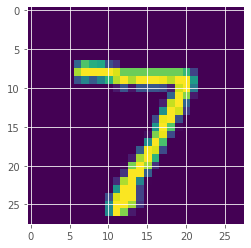

In [31]:
plt.imshow(x_test[0])   # [면, 행, 열]
plt.show()

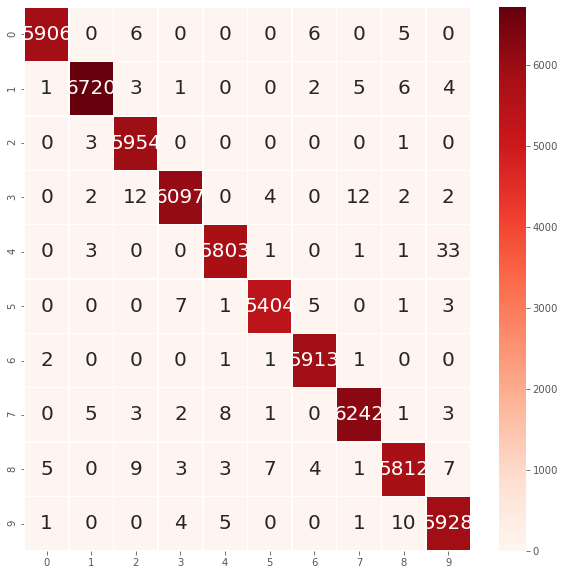

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(10,10))

sns.heatmap(confusion_matrix(y_train, model.predict( x_train.reshape(60000,28,28)).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
           );

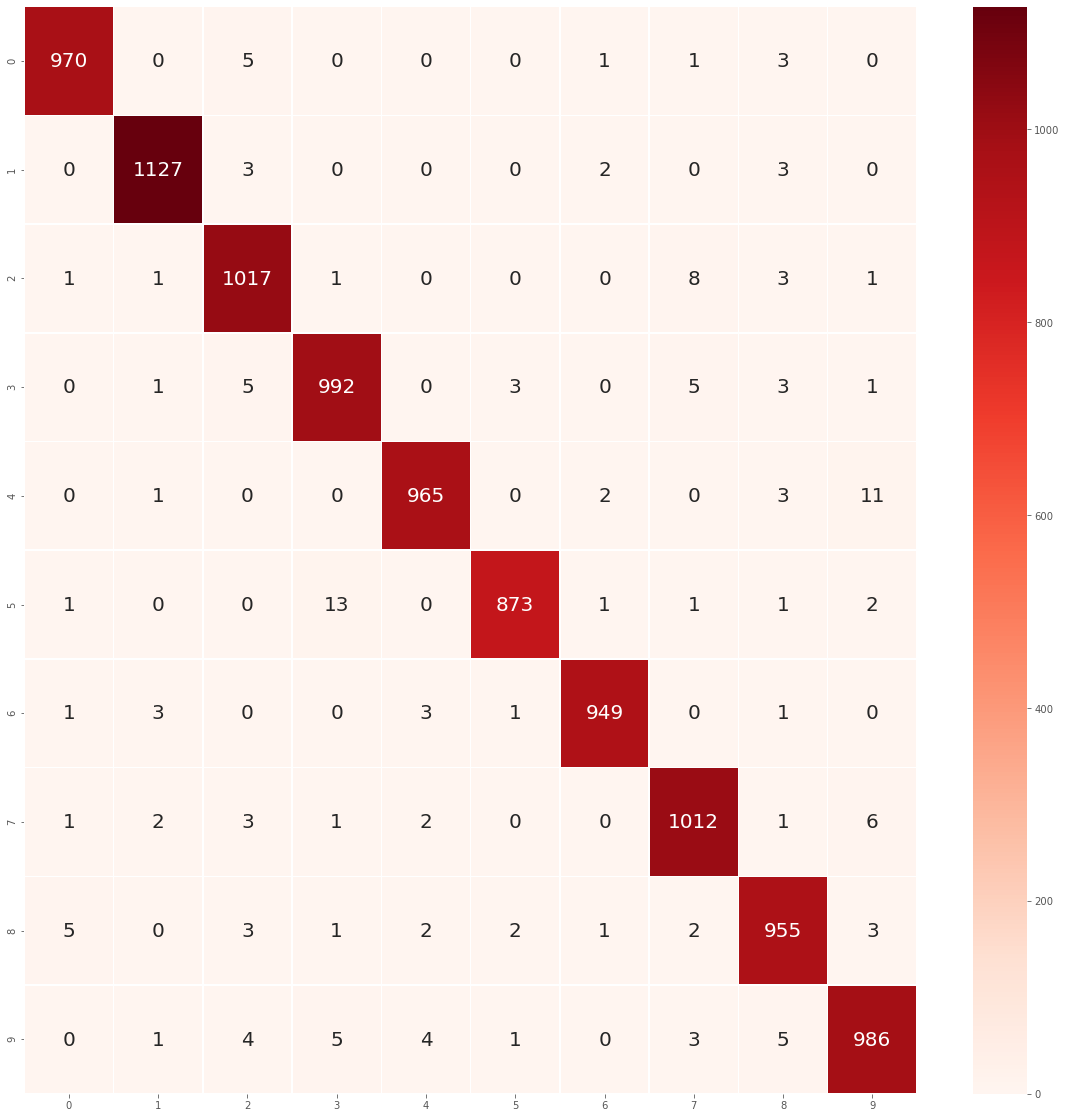

In [40]:
plt.figure(figsize=(20,20))

sns.heatmap(confusion_matrix(y_test, model.predict( x_test.reshape(10000,28,28)).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
            
           );